In [136]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

In [137]:
# 1. Загрузите изображение в оттенках серого sar_1_gray.jpg.

In [138]:
image = cv2.imread('sar_1_gray.jpg')

In [139]:
image_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

In [140]:
image1 = cv2.imread('sar_2_color.jpg')

In [141]:
image1_gray = cv2.cvtColor(image1, cv2.COLOR_BGR2GRAY) 

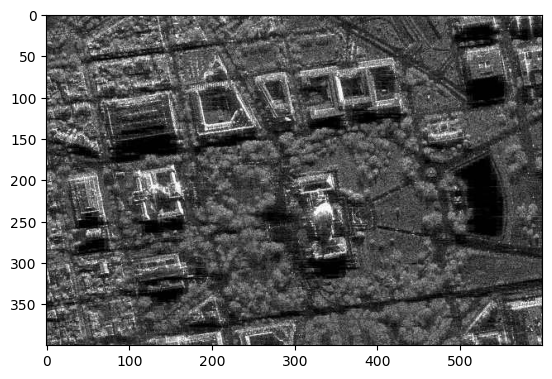

In [142]:
plt.imshow(image)

In [143]:
# 2. постройте гистограмму

In [144]:
hSize = 256
hRange = [0, 256]

h = cv2.calcHist([image], [0], None, [hSize], hRange, accumulate=False)

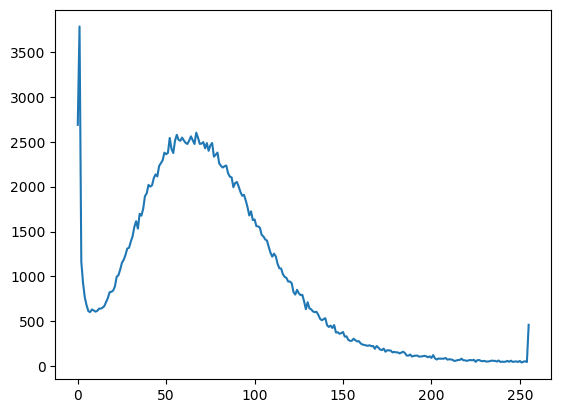

In [145]:
plt.plot(h);

In [146]:
# 3. реализуйте алгоритм гамма коррекции с параметром гамма <1, >1.

In [147]:
rMax = 255;
gamma1 = 0.5
im1_gray = image_gray; 
r1 = [((i / rMax) ** gamma1) * rMax for i in range(256)];
r1 = np.array(r1, np.uint8);
im1_gray = cv2.LUT(im1_gray, r1)

In [148]:
rMax = 255;
gamma2 = 4.0; 
im2_gray = image_gray; 
r2 = [((i / rMax) ** gamma2) * rMax for i in range(256)];
r2 = np.array(r2, np.uint8);
im2_gray = cv2.LUT(im2_gray, r2)

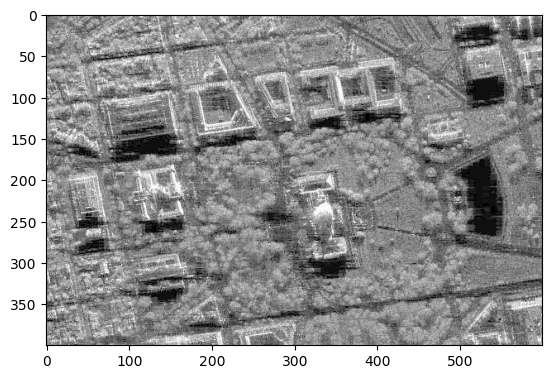

In [149]:
plt.imshow(im1_gray, cmap='gray');

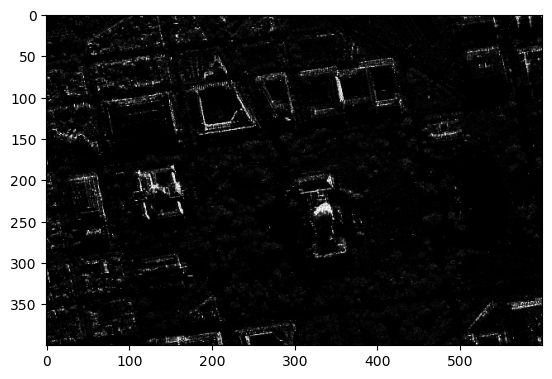

In [150]:
plt.imshow(im2_gray, cmap='gray');

In [151]:
# 4. Сравните исходное изображение, скорректированное при помощи гамма-фильтра. MSE, SSIM.

In [152]:
from skimage.metrics import structural_similarity, mean_squared_error

In [153]:
# MSE

In [154]:
mse = mean_squared_error(image_gray, im1_gray)

In [155]:
mse

3250.429145833333

In [156]:
# SSIM

In [157]:
(ssim, diff) = structural_similarity(image_gray, im1_gray, full=True)
diff = (diff * 255).astype("uint8")
print("SSIM: {}".format(ssim))

SSIM: 0.7875008686792753


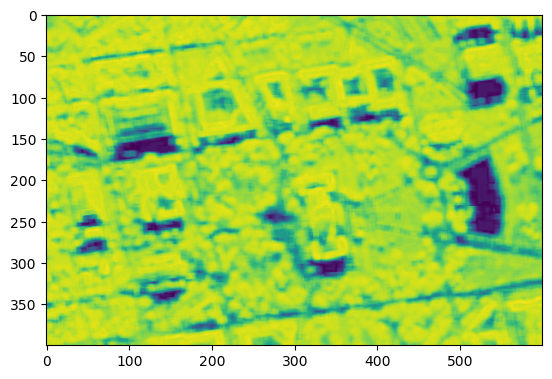

In [158]:
plt.imshow(diff)

In [159]:
# 5. реализуйте алгоритм статистической цветокоррекции на основе статистики eq_gray.

In [209]:
eq_gray = cv2.equalizeHist(image1_gray)
image_gray = cv2.equalizeHist(image_gray)

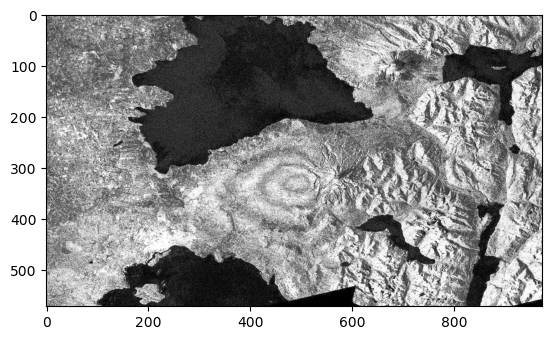

In [210]:
plt.imshow(eq_gray, cmap="gray")

In [255]:
e1 = np.sum(np.sum(eq_gray, axis = 0), axis = 0) # мат ожидание изображения eq_grey
e = np.sum(np.sum(image_gray, axis = 0), axis = 0) # мат ожидание изображения исходного

In [256]:
rows,cols = eq_gray.shape
rows1,cols1 = image_gray.shape

In [257]:
e1 /= (rows*cols)
e /= (rows1*cols1)

In [258]:
sum = 0
for i in range(rows):
    for j in range(cols):
        k   = eq_gray[i,j]
        sum += ((k-e1)**2);

In [259]:
d = (sum / (rows*cols))**0.5 # дисперсия изображения eq_gray

In [260]:
sum1 = 0
for i in range(rows1):
    for j in range(cols1):
        k1 = image_gray[i,j]
        sum1+=((k1-e)**2)

In [261]:
d1 = (sum1/(rows1*cols1))**0.5 # дисперсия изображения исходного

In [262]:
for i in range(rows1):
    for j in range(cols1):
        image_gray[i,j] = (image_gray[i,j]-e)*(d/d1)+e1

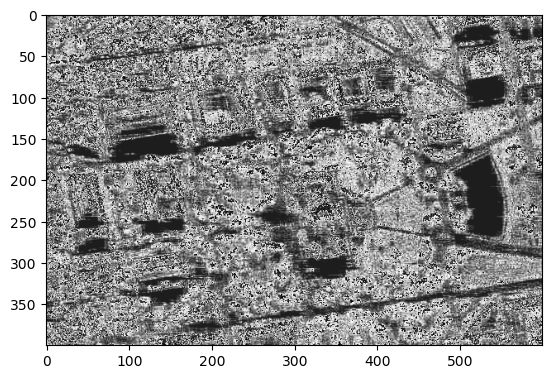

In [263]:
plt.imshow(image_gray, cmap="gray")

In [84]:
# 6. Протестируйте работу алгоритмов пороговой фильтрации с различными параметрами.

In [85]:
_,thresh1 = cv2.threshold(image_gray,200,255,cv2.THRESH_BINARY)

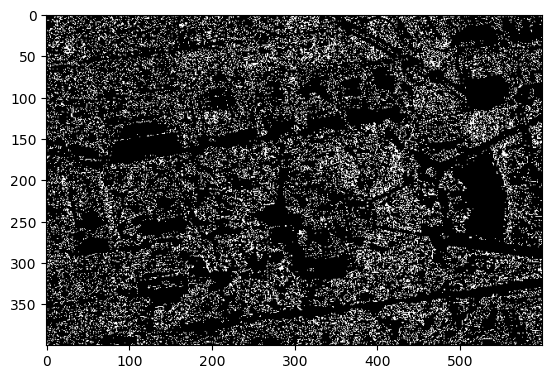

In [86]:
plt.imshow(thresh1, cmap='gray')

In [87]:
thresh1[thresh1==100].sum()

0

In [88]:
_,thresh2 = cv2.threshold(image_gray,100,255,cv2.THRESH_BINARY)

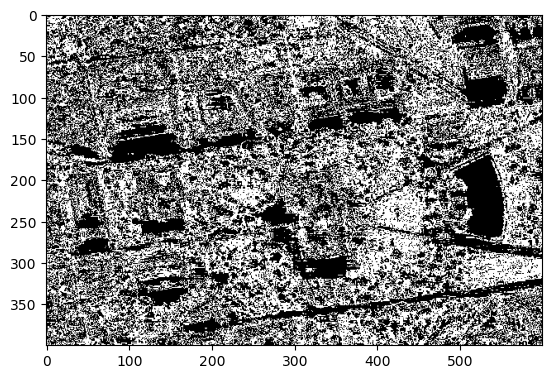

In [89]:
plt.imshow(thresh2, cmap='gray')

In [90]:
_,thresh3 = cv2.threshold(image_gray,10,255,cv2.THRESH_BINARY)

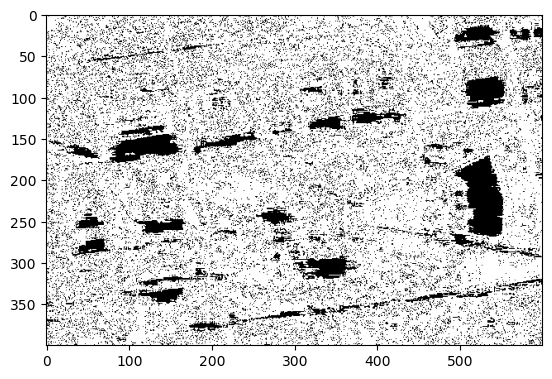

In [91]:
plt.imshow(thresh3, cmap='gray')